# Setup

Here we are importing functions written by staff to help with the project. You will not need to worry about these, but if you are curious to see what they look like, checkout the file `tm_helpers.py`. If you want to learn more about how these functions or have questions, let us know! :)

In [1]:
import utils.tm_helpers as helpers

# general
from tqdm import tqdm
import os
import regex as re

# preprocess functions
from nltk.tokenize import word_tokenize
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])


# topic modeling packages
import gensim
from gensim import models, corpora
from gensim.models.coherencemodel import CoherenceModel

# used to visualize the topic model
import pyLDAvis.gensim
import pyLDAvis

/usr/local/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence, Sized, Iterable, Callable
/usr/local/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence, Sized, Iterable, Callable


In [2]:
helpers.show_model()

Generating visual, this will take a few moments...


/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x        y  topics  cluster       Freq
topic                                               
2      0.081952  0.14081       1        1  35.040768
0     -0.177240 -0.00689       2        1  33.574291
1      0.095287 -0.13392       3        1  31.384935, topic_info=     Category       Freq              Term      Total  loglift  logprob
term                                                                   
453   Default  85.000000              cake  85.000000  30.0000  30.0000
6     Default  48.000000          computer  48.000000  29.0000  29.0000
1     Default  32.000000  computer_science  32.000000  28.0000  28.0000
1045  Default  22.000000              verb  22.000000  27.0000  27.0000
494   Default  25.000000           century  25.000000  26.0000  26.0000
825   Default  14.000000             vowel  14.000000  25.0000  25.0000
12    Default  20.000000            system  20.000000  24.0000  24.0000
1172  Default  13.000000       alternation  13.000000  23.0000  23.0000
0     Default  14.000000       computation  14.000000  22.0000  22.0000
821   Default  13.000000          syllable  13.000000  21.0000  21.0000
34    Default  13.000000       programming  13.000000  20.0000  20.0000
59    Default  13.000000       development  13.000000  19.0000  19.0000
3     Default  12.000000             study  12.000000  18.0000  18.0000
13    Default  12.000000            theory  12.000000  17.0000  17.0000
454   Default  13.000000             flour  13.000000  16.0000  16.0000
278   Default  37.000000              form  37.000000  15.0000  15.0000
8     Default  12.000000            design  12.000000  14.0000  14.0000
1140  Default  11.000000             class  11.000000  13.0000  13.0000
2     Default  11.000000       information  11.000000  12.0000  12.0000
23    Default  11.000000        discipline  11.000000  11.0000  11.0000
1089  Default  13.000000              noun  13.000000  10.0000  10.0000
1156  Default  10.000000         adjective  10.000000   9.0000   9.0000
24    Default  13.000000             field  13.000000   8.0000   8.0000
1141  Default  10.000000        declension  10.000000   7.0000   7.0000
11    Default  10.000000          software  10.000000   6.0000   6.0000
97    Default  10.000000           science  10.000000   5.0000   5.0000
15    Default  10.000000         computing  10.000000   4.0000   4.0000
457   Default  10.000000             sugar  10.000000   3.0000   3.0000
1139  Default   8.000000          singular   8.000000   2.0000   2.0000
1280  Default   8.000000        participle   8.000000   1.0000   1.0000
...       ...        ...               ...        ...      ...      ...
1059   Topic3   6.941285              loss   7.469290   1.0855  -4.9950
1047   Topic3   6.541629         diphthong   7.070148   1.0811  -5.0543
1180   Topic3   6.238444                je   6.765184   1.0778  -5.1017
1155   Topic3   6.237119              stem   6.765402   1.0775  -5.1020
1024   Topic3   5.293692             nasal   5.819977   1.0641  -5.2660
424    Topic3   4.731692            result   5.259983   1.0530  -5.3782
995    Topic3   4.358325                 t   4.885259   1.0447  -5.4604
993    Topic3   3.728317         consonant   4.255137   1.0267  -5.6165
1190   Topic3   3.654912       subjunctive   4.181459   1.0243  -5.6364
1142   Topic3   3.497585               -er   4.023951   1.0187  -5.6804
1089   Topic3  11.762541              noun  13.690912   1.0070  -4.4676
1133   Topic3   3.179449            neuter   3.709897   1.0045  -5.7758
816    Topic3   3.024989                 e   3.551349   0.9984  -5.8256
839    Topic3   3.024962                 l   3.551353   0.9984  -5.8256
952    Topic3   3.023741             music   3.551555   0.9980  -5.8260
757    Topic3   2.998004           cluster   3.525030   0.9969  -5.8345
1246   Topic3   2.794014            desjun   3.320170   0.9863  -5.9050
1205   Topic3   2.794011             value   3.320168   0.9863  -5.9050
1286   Topic3   2.79

In [3]:
topic_terms = helpers.show_topic_terms(helpers.soln, 3)
topic_terms

,W1,W1 Pr,W2,W2 Pr,W3,W3 Pr,W4,W4 Pr,W5,W5 Pr,W6,W6 Pr,W7,W7 Pr,W8,W8 Pr,W9,W9 Pr,W10,W10 Pr
Topic,,,,,,,,,,,,,,,,,,,,
0,computer,0.044,computer_science,0.029,system,0.017,computation,0.013,programming,0.012,study,0.011,theory,0.011,field,0.011,design,0.011,information,0.010
1,verb,0.022,form,0.015,vowel,0.014,alternation,0.013,syllable,0.012,development,0.012,noun,0.011,word,0.010,class,0.010,adjective,0.009
2,cake,0.074,century,0.022,language,0.020,form,0.018,flour,0.011,sugar,0.008,romance,0.007,butter,0.007,egg,0.007,bread,0.007


In [6]:
probs = topic_terms.iloc[2, [i for i in range(20) if i % 2 == 1]]
# probs.values

words = topic_terms.iloc[2, [i for i in range(20) if i % 2 == 0]]
# probs.values

<Figure size 648x432 with 0 Axes>

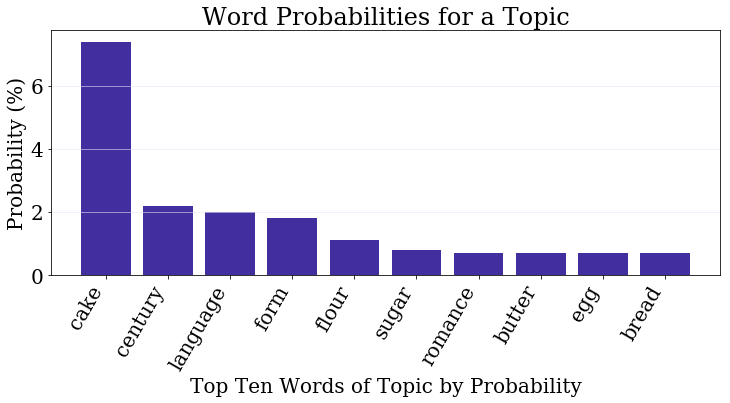

In [37]:
probs = topic_terms.iloc[2, [i for i in range(20) if i % 2 == 1]]
# probs.values

words = topic_terms.iloc[2, [i for i in range(20) if i % 2 == 0]]
# probs.values
import operator

# cat2score_sorted = sorted(d_over_i_emos.items(), key=operator.itemgetter(1), reverse=True)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.size': 20
})
plt.rcParams['figure.figsize'] = [9, 6]
fig, axs = plt.subplots(1, 1, figsize=(12, 5), sharey=False)

# ax 0
ax = 0
r = 0
c = 0
bars = [score * 100 for score in probs.values]
lables = [word for word in words.values]

axs.bar(range(1, len(bars) + 1), bars, color='#422e9e')
axs.grid(axis='y', alpha=0.7, color='lavender')
# axs[r][c].set_xlabel('Response Duration in Seconds')
# axs[r][c].set_ylabel('Frequency')
axs.set_title('Word Probabilities for a Topic')
axs.set_xlabel("Top Ten Words of Topic by Probability")
axs.set_ylabel("Probability (%)")


axs.set_xticks(range(1, len(bars) + 1), minor=False)
axs.set_xticklabels(lables, minor=False)
# axs.axhline(y=1, linewidth=4, color='red')


fig.autofmt_xdate(rotation=60)

plt.show()

<Figure size 648x432 with 0 Axes>

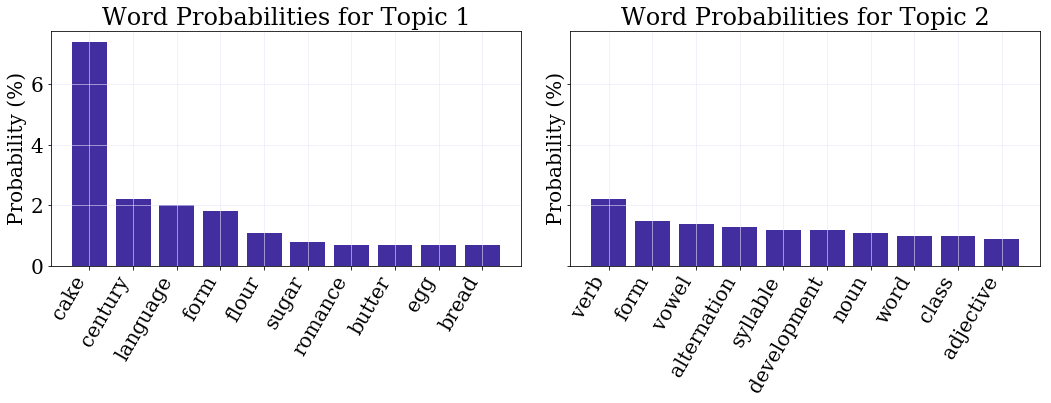

In [41]:
import operator

# cat2score_sorted = sorted(d_over_i_emos.items(), key=operator.itemgetter(1), reverse=True)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.size': 20
})
plt.rcParams['figure.figsize'] = [9, 6]
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True, sharex=False)

# ax 0
ax = 0
r = 0
c = 0
probs = topic_terms.iloc[2, [i for i in range(20) if i % 2 == 1]]
# probs.values

words = topic_terms.iloc[2, [i for i in range(20) if i % 2 == 0]]
# probs.values
bars = [score * 100 for score in probs.values]
lables_1 = [word for word in words.values]

axs[0].bar(range(1, len(bars) + 1), bars, color='#422e9e')
axs[0].grid(alpha=0.7, color='lavender')
axs[0].set_title('Word Probabilities for Topic 1')
# axs[0].set_xlabel("Top Ten Words of Topic by Probability")
axs[0].set_ylabel("Probability (%)")


axs[0].set_xticks(range(1, len(bars) + 1), minor=False)
axs[0].set_xticklabels(lables_1, minor=False)


probs = topic_terms.iloc[1, [i for i in range(20) if i % 2 == 1]]

words = topic_terms.iloc[1, [i for i in range(20) if i % 2 == 0]]
bars = [score * 100 for score in probs.values]
lables = [word for word in words.values]
axs[1].bar(range(1, len(bars) + 1), bars, color='#422e9e')
axs[1].grid(alpha=0.7, color='lavender')

axs[1].set_title('Word Probabilities for Topic 2')
# axs[1].set_xlabel("Top Ten Words of Topic by Probability")
axs[1].set_ylabel("Probability (%)")


axs[1].set_xticks(range(1, len(bars) + 1), minor=False)
axs[1].set_xticklabels(lables, minor=False)

fig.autofmt_xdate(rotation=60)
plt.tight_layout()
# plt.ylabel('Probability')
plt.show()

['cake', 'century', 'language', 'form', 'flour', 'sugar', 'romance', 'butter', 'egg', 'bread', 'verb', 'form', 'vowel', 'alternation', 'syllable', 'development', 'noun', 'word', 'class', 'adjective']


<Figure size 648x432 with 0 Axes>

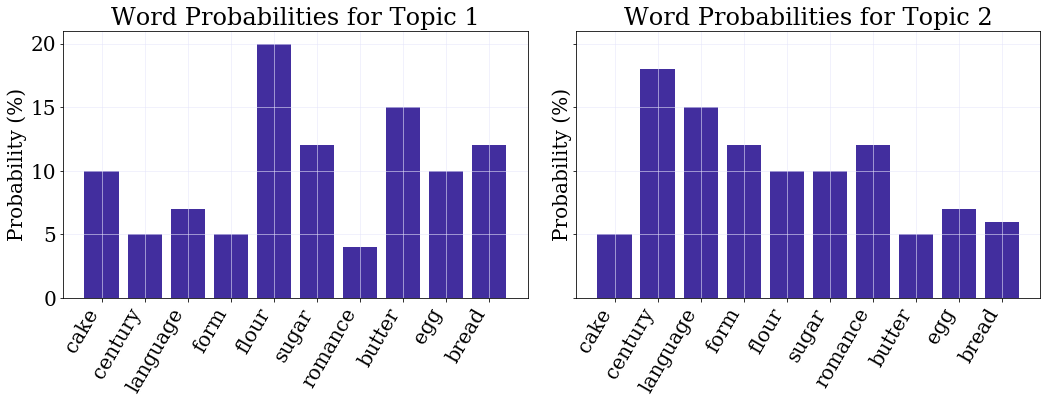

In [62]:
import operator

# cat2score_sorted = sorted(d_over_i_emos.items(), key=operator.itemgetter(1), reverse=True)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
plt.clf()
matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.size': 20
})
plt.rcParams['figure.figsize'] = [9, 6]
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True, sharex=True)

# ax 0
ax = 0
r = 0
c = 0
words = list(topic_terms.iloc[2, [i for i in range(20) if i % 2 == 0]].values) + list(topic_terms.iloc[1, [i for i in range(20) if i % 2 == 0]].values)
print(words)
# 10-5-7-8-20-5-8-15-10-12
dist = [10, 5, 7, 5, 20, 12, 4, 15, 10, 12]
# dist = [5,18,10,12,15,10,12,5,7,6]
bars = dist
lables_1 = [word for word in words]

axs[0].bar(range(1, len(bars) + 1), bars, color='#422e9e')
axs[0].grid(alpha=0.7, color='lavender')
axs[0].set_title('Word Probabilities for Topic 1')
axs[0].set_ylabel("Probability (%)")
axs[0].set_xticks(range(1, len(bars) + 1), minor=False)
axs[0].set_xticklabels(lables_1, minor=False)


probs = topic_terms.iloc[1, [i for i in range(20) if i % 2 == 1]]
# 100-5-6-10-12-15-12-18-5-7-10
dist = [5,18,15,12,10,10,12,5,7,6]
bars = dist
# lables = [word for word in words]
# random.shuffle(bars)
axs[1].bar(range(1, len(bars) + 1), bars, color='#422e9e')
axs[1].grid(alpha=0.7, color='lavender')

axs[1].set_title('Word Probabilities for Topic 2')
# axs[1].set_xlabel("Top Ten Words of Topic by Probability")
axs[1].set_ylabel("Probability (%)")


axs[1].set_xticks(range(1, len(bars) + 1), minor=False)
# axs[1].set_xticklabels(lables_1, minor=False)

fig.autofmt_xdate(rotation=60)
plt.tight_layout()
# plt.ylabel('Probability')
plt.show()

In [59]:
for w in ['cake', 'century', 'language', 'form', 'flour', 'sugar', 'romance', 'butter', 'egg', 'bread']:
    print(w, end=', ')

cake, century, language, form, flour, sugar, romance, butter, egg, bread, 

# Data

In this section you will:

1. Load bookcorpus
2. Cleanup stopwords
3. Join bigrams and trigrams
4. Final data preparation for gensim topic modeling

## 1. Load data

In [3]:
data = helpers.load_data()

**Let's preview what the data looks like.**

In [4]:
print("Data length:", len(data))
print("data[:10]", data[:10]) # data is a list, data[:10] is the first ten items of that list

Data length: 494
data[:10] ['Computer science is the study of computation and information.\n', 'Computer science deals with theory of computation, algorithms, computational problems and the design of computer systems hardware, software and applications.\n', 'Computer science addresses both human-made and natural information processes, such as communication, control, perception, learning and intelligence especially in human-made computing systems and machines.\n', 'According to Peter Denning, the fundamental question underlying computer science is, What can be automated?Its fields can be divided into theoretical and practical disciplines.\n', 'Computational complexity theory is highly abstract, while computer graphics and computational geometry emphasizes real-world applications.\n', 'Algorithmics is called the heart of computer science.\n', 'Programming language theory considers approaches to the description of computational processes, while software engineering involves the use of pro

# 2. Preprocessing

In [5]:
def preprocess_line(line):
    '''
    Fill in this function. Refer to 1-Intro-to-NLP for preprocessing ideas.
    '''
    preprocessed_line = []
    tokens = word_tokenize(line)
    
    # use spacy pipeline
    doc = nlp(" ".join(tokens))
    
    # allowed_postags
#     allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
    allowed_postags=['NOUN']
    
    
    # get pos_tags
    pos_tags = [token.pos_ for token in doc]
    
    # get_lemmas, also remove words that aren't in allowed pos tags, also remove stopwords
    lemmas = [token.lemma_ for token in doc if token.pos_ in allowed_postags and not token.is_stop]
    
    
    preprocessed_line = lemmas
    
    return preprocessed_line

def preprocess(data):
    preprocessed_data = []
    for line in tqdm(data):
        preprocessed_line = preprocess_line(line)
        preprocessed_data.append(preprocessed_line)
    return preprocessed_data

In [6]:
'''
A stopword solution
'''

# STOPWORDS = load_stopwords()
# print("Cleaning data")
# tokenized_data = []
# for text in tqdm(data):
#     cleaned = clean_text(text, STOPWORDS)
#     tokenized_data.append(cleaned)

'\nA stopword solution\n'

**Run call `preprocess` on `data` and save to `preprocessed_data`, and then preview our `preprocessed_data`. How does is look different than our earlier preview? Do you have a bug or does it look how you want it to look?**

In [7]:
preprocessed_data = preprocess(data)
print("data[:10]", preprocessed_data[:10]) # data is a list, data[:10] is the first ten items of that list

100%|██████████| 494/494 [00:01<00:00, 278.47it/s]

data[:10] [['computer', 'science', 'study', 'computation', 'information'], ['computer', 'science', 'deal', 'theory', 'computation', 'algorithm', 'problem', 'design', 'computer', 'system', 'hardware', 'software', 'application'], ['computer', 'science', 'human', 'information', 'process', 'communication', 'control', 'perception', 'learning', 'intelligence', 'human', 'computing', 'system', 'machine'], ['question', 'computer', 'science', 'field', 'discipline'], ['complexity', 'theory', 'computer', 'graphic', 'geometry', 'world', 'application'], ['heart', 'computer', 'science'], ['programming', 'language', 'theory', 'approach', 'description', 'process', 'software', 'engineering', 'use', 'programming', 'language', 'system'], ['computer', 'architecture', 'computer', 'engineering', 'deal', 'construction', 'computer', 'component', 'computer', 'equipment'], ['computer', 'interaction', 'challenge', 'computer'], ['intelligence', 'goal', 'process', 'problem', 'decision', 'making', 'adaptation', 'mot

## 3. Join bigrams and trigrams
**Next we will train a bigram model by using functions implemented by others (gensim) for us to use!**

TODO: I think I will have a "basic nlp" preprocessing project, where they'll learn what bigrams and trigrams are. They would do this before the topic modeling lesson, so we wouldn't need to explain what bigrams and trigrams are.

TODO: Add a link for reference to the gensim bigram model

In [8]:
bigram_model, bigram_phrases = helpers.train_bigram_model(preprocessed_data)

**Now we apply our bigram model to our data to join unigrams into bigrams where appropriate. To understand what the changes look like, the `preview_bigram_changes` function will output a few examples of lines that were changed by this process.**

In [9]:
data_words_bigrams = helpers.make_bigrams(preprocessed_data, bigram_model)

helpers.show_ngrams(preprocessed_data, data_words_bigrams)

100%|██████████| 494/494 [00:00<00:00, 38824.50it/s]


,Before,After
0,computer science,computer_science
1,software engineering,software_engineering
2,stress shift,stress_shift


**Now we will train a trigram model!**

TODO: Add a link for reference

In [10]:
trigram_model = helpers.train_trigram_model(preprocessed_data, bigram_phrases)

**Now we apply our bigram model to our data to join unigrams into bigrams where appropriate. To understand what the changes look like, the `preview_bigram_changes` function will output a few examples of lines that were changed by this process.**

In [11]:
data_words_trigrams = helpers.make_trigrams(data_words_bigrams, bigram_model, trigram_model)
helpers.show_ngrams(data_words_bigrams, data_words_trigrams)

100%|██████████| 494/494 [00:00<00:00, 19610.87it/s]


,Before,After


## 4. Final data preparation for gensim topic modeling

Todo: for now, I'm just taking a chunk of the data to speed up my developing process. I can go through the data and choose a couple appropriate books that the students can actually use.

In [12]:
print("Creating dictionary and corpus instances for gensim...", end='')

dictionary = corpora.Dictionary(data_words_trigrams[-10000:])
corpus = [dictionary.doc2bow(x) for x in data_words_trigrams[-10000:]]

print("complete.")

Creating dictionary and corpus instances for gensim...complete.


# Create Topic Model

In this section, you will:

1. Learn about topic model parameters
2. Create a topic model
3. Observe words associated with the topics
4. Evaluate quantitatively
5. Assign text lines to a topic

In [13]:
UPDATE_EVERY = 10
CHUNKSIZE = 100
# CHUNKSIZE = 10 soln

PASSES = 10
topic_model_settings = [{'num-topics':15, 'parameters':{'random_state':100, 'update_every':UPDATE_EVERY, 'chunksize':CHUNKSIZE, 'passes':PASSES, 'alpha':'auto', 'per_word_topics':False}}, 
                        {'num-topics':5,'parameters':{'random_state':100, 'update_every':UPDATE_EVERY, 'chunksize':CHUNKSIZE, 'passes':PASSES, 'alpha':'auto', 'per_word_topics':False}}, 
                        {'num-topics':10,'parameters':{'random_state':100, 'update_every':UPDATE_EVERY, 'chunksize':CHUNKSIZE, 'passes':PASSES, 'alpha':'auto', 'per_word_topics':False}}]


## 1. Learn about topic model parameters

Todo: add some things to show what the purpose of the main parameters are

**We've already come up with a few different parameter settings, the main difference being the number of topics we are targetting. Let's start with the first setting, which will create 15 topics.**

In [14]:
setting = topic_model_settings[0]
NUM_TOPICS = setting['num-topics']
NUM_TOPICS = 3

## 2. Create a topic model

**Now we create a topic model for our text using functions from gensim! This will take a few minutes, so take this time to review some content. You can check out [this resource](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/) on topic modeling as well, which will show several of the steps we have already covered in a bit more detail, and give you a preview of what we will do next!**

In [15]:
print("Training topic model (this will take a moment)...", end='')
lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary, random_state = setting['parameters']['random_state'], update_every = setting['parameters']['update_every'], chunksize = setting['parameters']['chunksize'], passes = setting['parameters']['passes'], alpha = setting['parameters']['alpha'], per_word_topics = setting['parameters']['per_word_topics'])
print("complete.")


Training topic model (this will take a moment)...complete.


## 3. Observe words associated with the topic

The columns of `topic_terms` are the top ten words of each topic (Wn) and Wn's probability of belonging to each topic (Wn Pr). 

In [16]:
topic_terms = helpers.show_topic_terms(lda_model, NUM_TOPICS)
topic_terms

,W1,W1 Pr,W2,W2 Pr,W3,W3 Pr,W4,W4 Pr,W5,W5 Pr,W6,W6 Pr,W7,W7 Pr,W8,W8 Pr,W9,W9 Pr,W10,W10 Pr
Topic,,,,,,,,,,,,,,,,,,,,
0,cake,0.038,computer,0.017,century,0.014,computer_science,0.011,information,0.010,programming,0.009,language,0.009,word,0.009,study,0.009,example,0.008
1,cake,0.031,computer,0.020,form,0.014,computer_science,0.013,verb,0.013,language,0.009,vowel,0.008,system,0.008,romance,0.007,alternation,0.007
2,language,0.015,noun,0.014,declension,0.013,class,0.013,adjective,0.011,form,0.011,history,0.008,case,0.008,term,0.008,computer,0.008


## 4. Evaluate quantitatively

**We will use two measures to evaluate the model: perplexity and coherence**

Todo: I'll expand on this a little bit to explain what these metrics mean

In [17]:
'''
6. Measure quality of topic models with perplexity
'''
print("Measuring model perplexity...",end="")
ppl = lda_model.log_perplexity(corpus)
print('complete. Perplexity:', ppl, '\n')  # a measure of how good the model is. lower the better.

'''
7. Measure quality of topic models with coherence
'''
print("Measuring model coherence...",end="")
coherence_model_lda = CoherenceModel(model=lda_model, texts = data_words_trigrams[-10000:], corpus=corpus, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('complete. Coherence Score:', coherence_lda, '\n') 

Measuring model perplexity...complete. Perplexity: -6.982638798070078 

Measuring model coherence...complete. Coherence Score: 0.524049569197438 



## 5. Assign text lines to a topic

In [18]:
from collections import defaultdict
import operator
'''
9. Save topic assignments for unique texts in a datastructure
'''
print("Making document topic assignments...")
text2distro = {}
for x in range(len(corpus)):
    topicdistribution = lda_model[corpus[x]]     # a list of tuples, e.g., [(8, 0.14625458), (10, 0.79183161)]
    topicarray = [0]*NUM_TOPICS

    for (topicid,topicprc) in topicdistribution:
        topicarray[topicid] = topicprc
    try:
        text2distro[' '.join(data_words_trigrams[-10000:][x])] = topicarray
    except:
        print('x:', x, "len(data_words_trigrams[-10000:]):", len(data_words_trigrams[-10000:]))

top_topics = defaultdict(lambda:0)
second_top_topics = defaultdict(lambda:0)
text2scores = defaultdict(lambda:0)

for text in text2distro:
    if len(text) > 1:
        distro = text2distro[text]
        idx2score = {i:score for i, score in enumerate(distro)}
        scores_sorted = sorted(idx2score.items(), key=operator.itemgetter(1), reverse=True)
        top_topic = scores_sorted[0][0]
        top_topics[top_topic] += 1
        second_top_topics[scores_sorted[1][0]] += 1
        text2scores[text] = scores_sorted

# print("Top topic distribution:\n", top_topics)
# print("\n\nSecond top topic distribution:\n", second_top_topics)

print("Topic #", '\t', "% docs assigned")
total = sum(top_topics.values())
for i in range(NUM_TOPICS):
    print(i, '\t', "{:.2%}".format(top_topics[i]/total))
print('complete.\n')

Making document topic assignments...
Topic # 	 % docs assigned
0 	 33.19%
1 	 49.12%
2 	 17.70%
complete.



## 5. Visualize the topics

**It will take a few moments to load up the visual**

In [19]:
helpers.show_model(lda_model, corpus, dictionary)

Generating visual, this will take a few moments...


/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.018805 -0.095574       1        1  47.888680
0     -0.096013  0.032224       2        1  35.818119
2      0.077209  0.063350       3        1  16.293200, topic_info=     Category       Freq              Term      Total  loglift  logprob
term                                                                   
454   Default  94.000000              cake  94.000000  30.0000  30.0000
1090  Default  10.000000              noun  10.000000  29.0000  29.0000
1142  Default   7.000000        declension   7.000000  28.0000  28.0000
1141  Default   8.000000             class   8.000000  27.0000  27.0000
1157  Default   6.000000         adjective   6.000000  26.0000  26.0000
1046  Default  20.000000              verb  20.000000  25.0000  25.0000
34    Default  13.000000       programming  13.000000  24.0000  24.0000
52    Default   5.000000           history   5.000000  23.0000  23.0000
33    Default  33.000000          language  33.000000  22.0000  22.0000
459   Default   9.000000             bread   9.000000  21.0000  21.0000
2     Default  13.000000       information  13.000000  20.0000  20.0000
92    Default  10.000000              term  10.000000  19.0000  19.0000
495   Default  23.000000           century  23.000000  18.0000  18.0000
1112  Default   4.000000      stress_shift   4.000000  17.0000  17.0000
129   Default   4.000000        transistor   4.000000  16.0000  16.0000
279   Default  33.000000              form  33.000000  15.0000  15.0000
393   Default  11.000000              case  11.000000  14.0000  14.0000
10    Default   7.000000           problem   7.000000  13.0000  13.0000
826   Default  14.000000             vowel  14.000000  12.0000  12.0000
3     Default  14.000000             study  14.000000  11.0000  11.0000
113   Default  11.000000              area  11.000000  10.0000  10.0000
1140  Default   7.000000          singular   7.000000   9.0000   9.0000
22    Default   7.000000           process   7.000000   8.0000   8.0000
1173  Default  12.000000       alternation  12.000000   7.0000   7.0000
430   Default   2.000000           student   2.000000   6.0000   6.0000
209   Default  14.000000           example  14.000000   5.0000   5.0000
112   Default   4.000000        department   4.000000   4.0000   4.0000
60    Default   5.000000        calculator   5.000000   3.0000   3.0000
234   Default   5.000000         paradigms   5.000000   2.0000   2.0000
507   Default   2.000000              milk   2.000000   1.0000   1.0000
...       ...        ...               ...        ...      ...      ...
1039   Topic3   0.734311             count   1.237634   1.2924  -6.5857
1145   Topic3   0.734311         masculine   1.237635   1.2924  -6.5857
1104   Topic3   0.734309               OFr   1.237633   1.2924  -6.5857
1036   Topic3   0.734311            bounty   1.237635   1.2924  -6.5857
1035   Topic3   0.734304             bonté   1.237636   1.2924  -6.5857
703    Topic3   1.100757              half   1.862481   1.2885  -6.1809
1143   Topic3   1.755749               -er   3.149309   1.2301  -5.7140
112    Topic3   2.368908        department   4.406565   1.1938  -5.4145
1134   Topic3   1.689885            neuter   3.178638   1.1826  -5.7522
10     Topic3   3.445415           problem   7.853913   0.9905  -5.0399
92     Topic3   4.294747              term  10.393433   0.9306  -4.8195
60     Topic3   2.374822        calculator   5.182805   1.0340  -5.4120
727    Topic3   1.834917            change   3.800999   1.0862  -5.6699
22     Topic3   2.932270           process   7.147738   0.9234  -5.2011
393    Topic3   4.314905              case  11.977467   0.7935  -4.8148
33     Topic3   7.894189          language  33.399097   0.3720  -4.2108
279    Topic3   6.020164              form  33.754959   0.0904  -4.4818
1140   Topic3   2.641298          singular   7.458184   0.7764  -5.3056
0      Topic3  

# References

1. https://dl.acm.org/doi/fullHtml/10.1145/2133806.2133826
2. https://nlpforhackers.io/topic-modeling/
3. https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/  -- for more analyses of topic models